## Imports

In [183]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

## Functions

In [184]:
def rk4_system(f, g, A, B, N, x0, y0):
    """
    Classical RK4 for a 2D autonomous system:
        x' = f(x, y)
        y' = g(x, y)
    """

    h = (B - A) / float(N)

    t = np.linspace(A, B, N+1)
    x = np.zeros(N+1)
    y = np.zeros(N+1)

    x[0] = x0
    y[0] = y0

    for i in range(N):
        # For x
        k1 = f(x[i], y[i])
        l1 = g(x[i], y[i])

        k2 = f(x[i] + 0.5*h*k1, y[i] + 0.5*h*k1)
        l2 = g(x[i] + 0.5*h*l1, y[i] + 0.5*h*l1)

        k3 = f(x[i] + 0.5*h*k2, y[i] + 0.5*h*k2)
        l3 = g(x[i] + 0.5*h*l2, y[i] + 0.5*h*l2)

        k4 = f(x[i] + h*k3,     y[i] + h*k3)
        l4 = g(x[i] + h*l3,     y[i] + h*l3)

        x[i+1] = x[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        y[i+1] = y[i] + (h/6)*(l1 + 2*l2 + 2*l3 + l4)

    return t, x, y


In [185]:
def simulate_lv(a,b,c,d,A, B, N, x0, y0):
    """
    Wrapper to run RK4 for the Lotka-Volterra system.
    """
    
    f = lambda x, y: a*x - b*x*y       # prey dx/dt
    g = lambda x, y: d*x*y - c*y      # predator dy/dt

    return rk4_system(f, g, A, B, N, x0, y0)


## Graphs

In [186]:
def plot_time_series(t, x, y):
    plt.figure(figsize=(10,5))
    plt.plot(t, x, label="Prey", linewidth=2)
    plt.plot(t, y, label="Predator", linewidth=2)
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.title("Predator–Prey Time Series")
    plt.grid(True)
    plt.legend()
    plt.show()


In [187]:
def plot_phase_portrait(x, y, a,b,c,d):
    plt.figure(figsize=(6,6))
    plt.plot(x, y, linewidth=2)
    plt.plot(c/d, a/b,'or',label="Equilibrium Point")
    plt.xlabel("Prey population")
    plt.ylabel("Predator population")
    plt.title("Phase Portrait: Predator–Prey")
    plt.grid(True)
    plt.legend()
    plt.show()


In [188]:
# Simulation interval
A, B = 0, 100
N = 10000

## Cases


## **Case 1 — Slow prey growth, weak predators 🐇🦊**

**Parameters:**

* (a = 0.40, b = 0.010, c = 0.25, d = 0.004)
* Initial: ($x_0 = 30, \; y_0 = 30$)

**Analysis:**

* Prey growth is **moderate** ((a = 0.4)), so the rabbit population doesn’t explode.
* Predation is weak ((b = 0.01, d = 0.004)), so foxes do not heavily reduce the prey population.
* Predator natural death is low ((c = 0.25)), so predators survive relatively easily.

**Equilibrium point:**
$$
x^* = \frac{c}{d} = \frac{0.25}{0.004} \approx 62.5, \quad y^* = \frac{a}{b} = \frac{0.4}{0.01} = 40
$$

**Behavior:**

* Expect **gentle, smooth oscillations** around the equilibrium.
* Prey slightly **leads** the predator population because predator growth depends on prey.
* Populations remain relatively stable, no risk of extinction 🐇🦊.



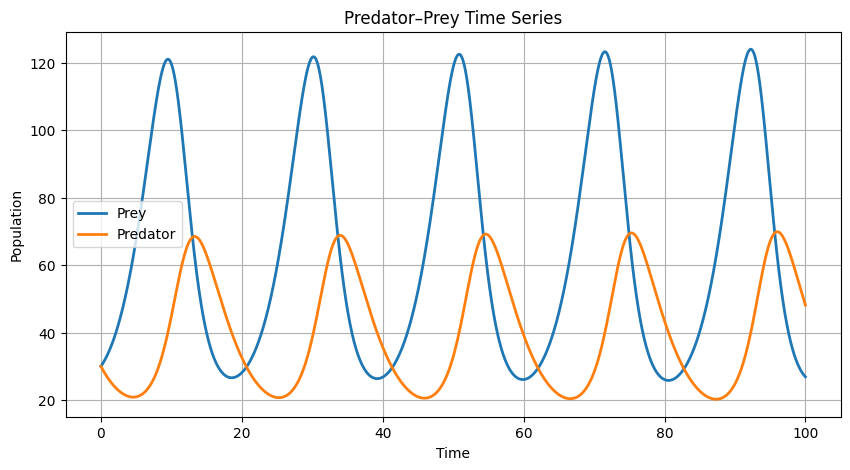

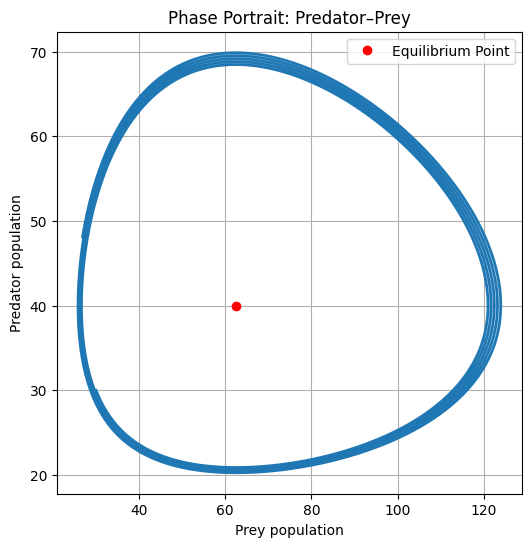

In [189]:
# Parameters
a=0.4
b=0.01
c=0.25
d=0.004

# Initial values
x0 = 30
y0 = 30

t, x, y = simulate_lv(a,b,c,d,A, B, N, x0, y0)

plot_time_series(t, x, y)
plot_phase_portrait(x, y,a,b,c,d)


## **Case 2 — Fast prey growth, weak predation 🌱🦊**

**Parameters:**

* (a = 1.00, b = 0.005, c = 0.35, d = 0.010)
* Initial: ($x_0 = 50, \; y_0 = 10$)

**Analysis:**

* Prey grows **very quickly** ((a = 1.0)), rabbit population skyrockets if predators are weak.
* Predation is weak ((b = 0.005, d = 0.010)), so predators cannot control prey effectively.
* Predator death rate (c = 0.35) is moderate.

**Equilibrium point:**
$$
x^* = \frac{c}{d} = \frac{0.35}{0.010} = 35, \quad y^* = \frac{a}{b} = \frac{1.0}{0.005} = 200
$$

**Behavior:**

* Prey dominates initially due to high growth 🌱.
* Predators will eventually **catch up**, but oscillations are **larger in amplitude**.
* Could see **boom-and-bust cycles**: prey overshoot → predator rises → prey declines → predator declines.



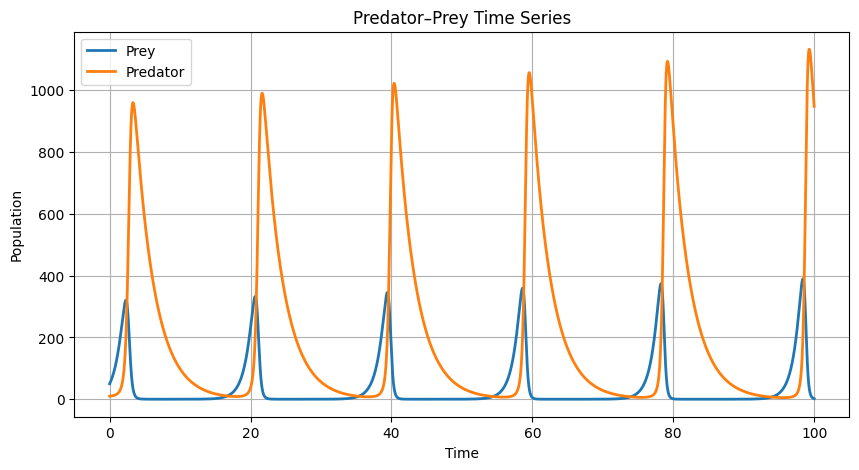

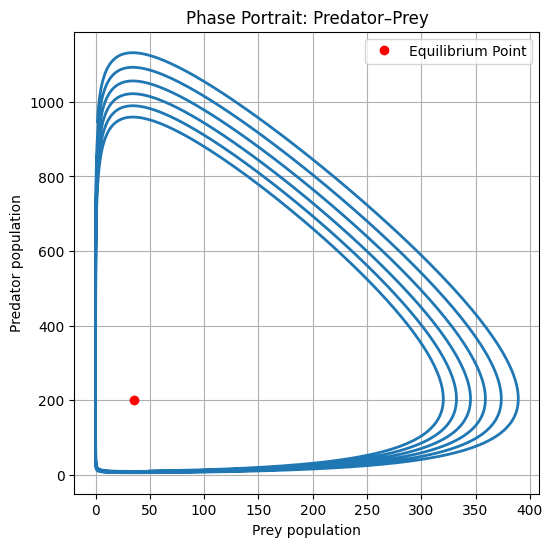

In [190]:
# Parameters
a=1
b=0.005
c=0.35
d=0.01

# Initial values
x0 = 50
y0 = 10

t, x, y = simulate_lv(a,b,c,d,A, B, N, x0, y0)

plot_time_series(t, x, y)
plot_phase_portrait(x, y,a,b,c,d)


## **Case 3 — Strong predation, slow prey growth 🐇⚡🦊**

**Parameters:**

* (a = 0.25, b = 0.020, c = 0.80, d = 0.015)
* Initial: ($x_0 = 40, \; y_0 = 20$)

**Analysis:**

* Prey grows **slowly** ((a = 0.25)) 🐇.
* Predation is strong ((b = 0.02, d = 0.015)), predators can heavily reduce prey.
* Predator natural death is high ((c = 0.8)), so predators need prey to survive.

**Equilibrium point:**
$$
x^* = \frac{c}{d} = \frac{0.8}{0.015} \approx 53.33, \quad y^* = \frac{a}{b} = \frac{0.25}{0.02} = 12.5
$$

**Behavior:**

* Prey population stays **low**, predator population is **moderate**.
* Oscillations are **damped and faster**, because prey cannot sustain predator for long periods.
* Risk of **prey depletion** if initial predator numbers are high ⚠️.



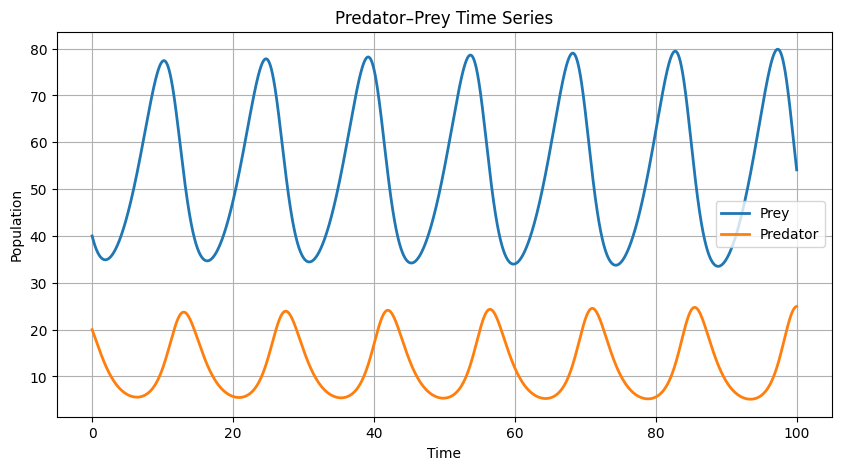

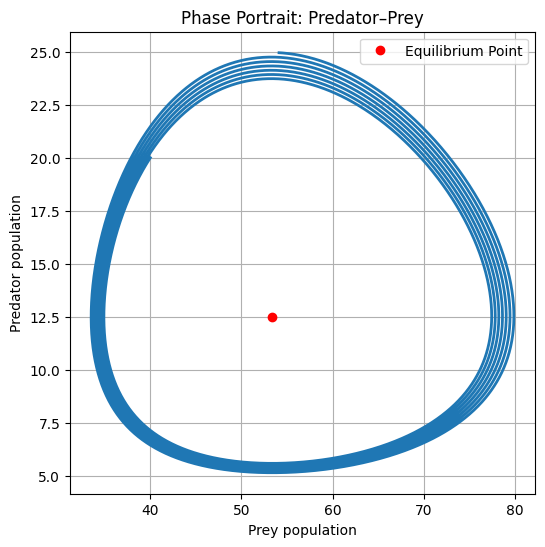

In [191]:
# Parameters
a=0.25
b=0.02
c=0.8
d=0.015

# Initial values
x0 = 40
y0 = 20

t, x, y = simulate_lv(a,b,c,d,A, B, N, x0, y0)

plot_time_series(t, x, y)
plot_phase_portrait(x, y,a,b,c,d)


## **Case 4 — Rapid predator decay, moderate prey 🐇💨🦊**

**Parameters:**

* (a = 0.70, b = 0.015, c = 0.50, d = 0.020)
* Initial: ($x_0 = 25,\; y_0 = 18$)

**Analysis:**

* Prey grows moderately ((a = 0.7)), predator death rate is high ((c = 0.5)) 💨.
* Predation is moderate ((b = 0.015, d = 0.020)), so predator growth depends heavily on prey availability.

**Equilibrium point:**
$$
x^* = \frac{c}{d} = \frac{0.5}{0.02} = 25, \quad y^* = \frac{a}{b} = \frac{0.7}{0.015} \approx 46.67
$$

**Behavior:**

* Prey and predator numbers are **moderately balanced**.
* Predator population **decays quickly** if prey dips, leading to oscillations where prey recovers rapidly.
* Populations oscillate around equilibrium, with **prey slightly leading predator**.



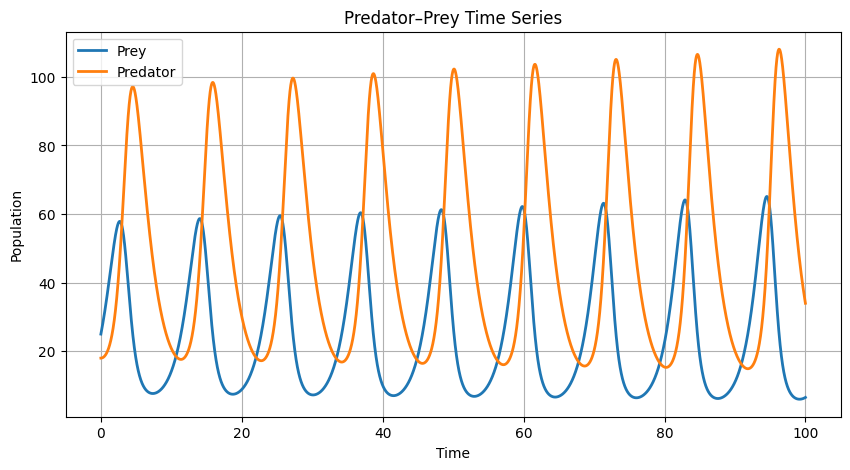

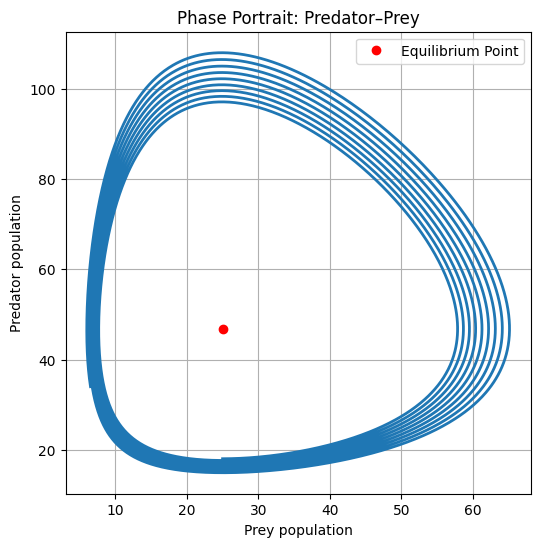

In [192]:
# Parameters
a=0.7
b=0.015
c=0.50
d=0.02

# Initial values
x0 = 25
y0 = 18

t, x, y = simulate_lv(a,b,c,d,A, B, N, x0, y0)

plot_time_series(t, x, y)
plot_phase_portrait(x, y,a,b,c,d)



## **Case 5 — Strong predators with high efficiency 🦊💪🐇**

**Parameters:**

* (a = 0.55, b = 0.030, c = 0.90, d = 0.025)
* Initial: ($x_0 = 20,\; y_0 = 40$)

**Analysis:**

* Predators are **strong and efficient** ((b = 0.03, d = 0.025)) 💪.
* Prey growth is moderate ((a = 0.55)), predator death is high ((c = 0.90)).
* High predation rate may **suppress prey heavily**, predator population will **oscillate sharply** with prey availability.

**Equilibrium point:**
$$
x^* = \frac{c}{d} = \frac{0.9}{0.025} = 36, \quad y^* = \frac{a}{b} = \frac{0.55}{0.03} \approx 18.33
$$

**Behavior:**

* Prey remains **low** relative to predator.
* Oscillations are **more extreme**, predator numbers rise quickly when prey is available, then decline sharply as prey drops.
* Risk of **prey extinction in short-term spikes** ⚠️.


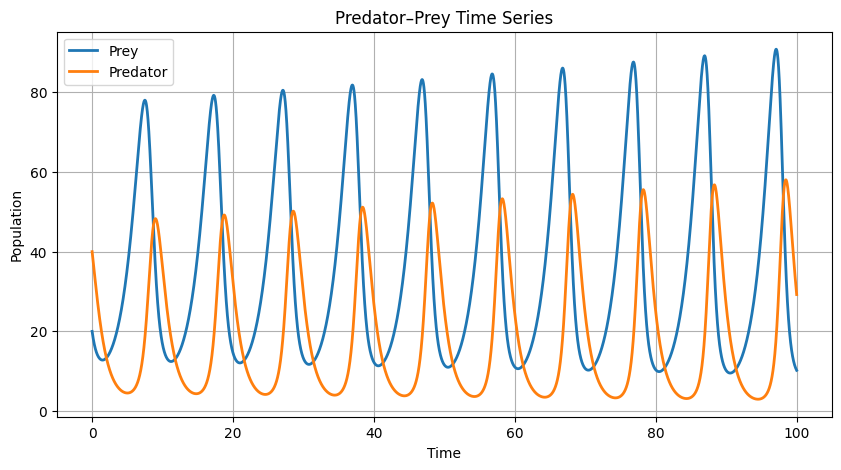

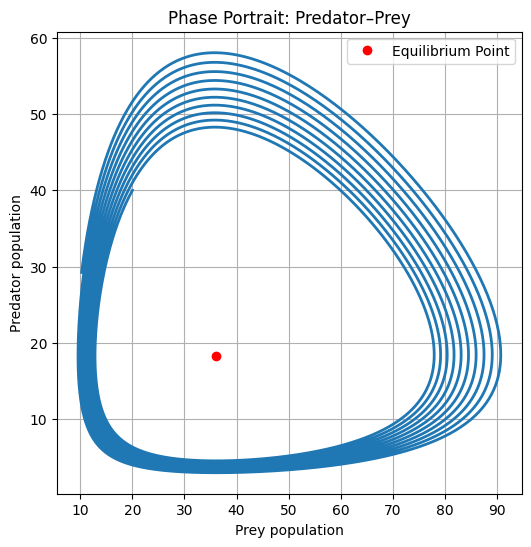

In [193]:
# Parameters
a=0.55
b=0.03
c=0.9
d=0.025

# Initial values
x0 = 20
y0 = 40

t, x, y = simulate_lv(a,b,c,d,A, B, N, x0, y0)

plot_time_series(t, x, y)
plot_phase_portrait(x, y,a,b,c,d)
